# A Smörgåsbord of delicious new MariaDB Features

## Welcome to Country

I begin today by acknowledging the Wurundjeri Woi Wurrung people of the Kulin Nation, Traditional Custodians of the land on which we gather today, and pay my respects to their Elders past and present. I extend that respect to Aborigines and Torres Strait Islanders here today.

# (Optional) Follow along with your own Web Instance

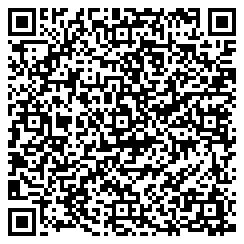

## http://tiny.cc/mariadb-delicious

## New Features

New? 10.6 - GA August 2021 was until this year, the last LTS.

This talk covers 10.7+, which started GA in Feb 2022

In [ ]:
select version();

version()
10.11.2-MariaDB-1:10.11.2+maria~ubu2204


## UUID is a datatype

Added 10.7

In [ ]:
use test;
CREATE TABLE uuidt1 (id UUID);
INSERT INTO uuidt1 VALUES ('123e4567-e89b-12d3-a456-426655440000');
SELECT * FROM uuidt1;

In [ ]:
SELECT CAST(x'102030405000000000000000adcefeff' AS UUID);

In [ ]:
CREATE OR REPLACE TABLE uuidt2 (
c1 UUID DEFAULT 0x00000000000000000000000000000000,
c2 UUID DEFAULT 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,
c3 UUID DEFAULT '00000000-0000-0000-0000-000000000000',
c4 UUID DEFAULT 'ffffffff-ffff-ffff-ffff-ffffffffffff',
c5 UUID DEFAULT CAST(X'FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF' AS UUID)
);

In [ ]:
SELECT CAST('longlive-that-bear-a456-426655440000' AS UUID);

In [ ]:
SHOW WARNINGS;

Stored like a BINARY(32), looks like a string. Stored in UUIDv4 index friendly for for bulk inserting.

## INET4 data type (10.10+)

Reminder - INET6 is a 10.5+ datatype for IPv6 and IPv4

In [ ]:
create or replace table inet6_table (ip inet6);
insert into inet6_table values ("::127.0.0.1"),("2001:db8::8a2e:370:7334");
select * from inet6_table where ip="2001:0db8:0000:0000:0000:8a2e:0370:7334";

In [ ]:
create or replace table inet4_table(ip inet4);
insert into inet4_table values ('127.0.0.1'), ('192.168.0.255'), ('239.2.3.55');
select * from inet4_table;

## UCA 14.0.0 (10.10)

Unicode 14.0.0 standard from Sept 2021.

In [ ]:
SELECT * FROM INFORMATION_SCHEMA.COLLATIONS where collation_name like 'uca1400_%';

In [ ]:
create table uca14_t1 (col1 longtext character set utf8mb4 collate uca1400_croatian_ai_ci);

Note:
* as/ai - accent sensitive/ insensitive
* cs/ci - case sensitive/ insensitive


## JSON_EQUALS (10.7)

In [ ]:
SELECT JSON_EQUALS('{"a"   :[1, 2, 3],"b":[4]}', '{"b":[4],"a":[1, 2, 3.0]}');

In [ ]:

SELECT JSON_EQUALS('{"a":[1, 2, 3]}', '{"a":[3, 2, 1]}');

## JSON_NORMALIZE (10.7)
When `JSON_EQUALS(a , b)`, implies `JSON_NORMALIZE(a) == JSON_NORMALIZE(b)`.


In [ ]:
CREATE OR REPLACE TABLE json_normalize_t1 (
 id BIGINT UNSIGNED NOT NULL AUTO_INCREMENT,
 val JSON,
 PRIMARY KEY (id)
);

In [ ]:
ALTER TABLE json_normalize_t1
   ADD COLUMN jnorm JSON AS (JSON_NORMALIZE(val)) VIRTUAL,
   ADD UNIQUE KEY (jnorm);

In [ ]:
INSERT INTO json_normalize_t1 (val) VALUES ('{"name":"alice","color":"blue"}');

In [ ]:
INSERT INTO json_normalize_t1 (val) VALUES ('{ "color": "blue", "name": "alice" }');

## JSON_PRETTY

(Alias for JSON_DETAILED) - MySQL compatibility

In [ ]:
SELECT JSON_PRETTY('{ "A":1,"B":[2,3]}');

## CRC32C (10.8)

In [ ]:
SELECT CRC32C('MariaDB');

## RANDOM_BYTES (10.10)

In [ ]:
SELECT HEX(RANDOM_BYTES(100));

## JSON Histograms (10.8)

Statistical column information - for query planning.

In [ ]:
CREATE OR REPLACE TABLE JSON_HISTOGRAMS (v varchar(30));

In [ ]:
insert into JSON_HISTOGRAMS SELECT "Jane" FROM seq_1_to_20;

In [ ]:
insert into JSON_HISTOGRAMS SELECT "Bob" FROM seq_1_to_2;

In [ ]:
insert into JSON_HISTOGRAMS SELECT "Julie";

In [ ]:
SET STATEMENT histogram_type = 'JSON_HB' FOR  ANALYZE TABLE JSON_HISTOGRAMS PERSISTENT FOR ALL;

In [ ]:
SELECT * FROM mysql.column_stats;

## NATURAL_SORT_KEY (10.7)

In [ ]:
CREATE TABLE nsk_t1 (c TEXT);

In [ ]:
insert into nsk_t1 values ('b1'),('a2'),('a11'),('a1');

In [ ]:
select c from nsk_t1 order by c;

In [ ]:
select c from nsk_t1 order by natural_sort_key(c);

In [ ]:
truncate table nsk_t1;

In [ ]:
INSERT INTO nsk_t1 VALUES 
  ('5.5.31'),('10.7.0'),('10.2.1'),
  ('10.1.22'),('10.3.32'),('10.2.12');

In [ ]:
select c from nsk_t1 order by natural_sort_key(c);

In [ ]:
truncate table nsk_t1;

In [ ]:
INSERT INTO nsk_t1 VALUES 
  ('192.167.3.1'),('192.167.1.12'),('100.200.300.400'),
  ('100.50.60.70'),('100.8.9.9'),('127.0.0.1'),('0.0.0.0');

In [ ]:
select c from nsk_t1 order by natural_sort_key(c);

## SFORMAT - Python Like formatting (10.7)

In [ ]:
select sformat('The temperature is between {:-} and {:-} degrees celsius.', -3, 7);

In [ ]:
CREATE TABLE test_sformat(mdb_release char(6), mdev int, feature char(20));

In [ ]:
INSERT INTO test_sformat VALUES('10.7.0', 25015, 'Python style sformat'), 
  ('10.7.0', 4958, 'UUID');

In [ ]:

SELECT SFORMAT('MariaDB Server {} has a preview for MDEV-{} which is about {}', 
  mdb_release, mdev, feature) AS 'Preview Release Examples'
  FROM test_sformat;

## Descending Indexes (10.8.1)

In [ ]:
create or replace table desc_index_t1 (a int, b int, c int, key r (a desc, b asc));
insert desc_index_t1 select seq % 10, seq div 10, seq from seq_1_to_55;
insert desc_index_t1 values (NULL, NULL, NULL), (9, NULL, NULL);


In [ ]:

analyze format=json select * from desc_index_t1 force index(r) order by a desc,b limit 20;

In [ ]:

analyze format=json  select * from desc_index_t1 force index(r) order by a asc,b desc limit 20;

## Convert Partitions (10.7)

The previous way paritions where exchanged:

In [ ]:
CREATE OR REPLACE TABLE partitioned_table (
        dt DATETIME NOT NULL,  -- or DATE
        id int not null auto_increment,
        PRIMARY KEY (id, dt)
    )
    PARTITION BY RANGE (TO_DAYS(dt)) (
        PARTITION start        VALUES LESS THAN (0),
        PARTITION from20120315 VALUES LESS THAN (TO_DAYS('2012-03-16')),
        PARTITION from20120316 VALUES LESS THAN (TO_DAYS('2012-03-17')),
        PARTITION from20120414 VALUES LESS THAN (TO_DAYS('2012-04-15')),
        PARTITION from20120415 VALUES LESS THAN (TO_DAYS('2012-04-16'))
    );

-- create an empty non-partitioned table
CREATE OR REPLACE TABLE normal_table LIKE partitioned_table;
ALTER TABLE normal_table REMOVE PARTITIONING;

-- perform the exchange
ALTER TABLE partitioned_table EXCHANGE PARTITION start WITH TABLE normal_table;

-- and remove the now-empty partition
ALTER TABLE partitioned_table DROP PARTITION start;

Converting a table to a partition

In [ ]:
CREATE OR REPLACE TABLE normal_table (
        dt DATETIME NOT NULL,  -- or DATE
        id int not null auto_increment,
        PRIMARY KEY (id, dt)
    );
    
insert into normal_table values (now(), 1), (now(), 3);

-- create an empty partition
ALTER TABLE partitioned_table ADD PARTITION (PARTITION part1 VALUES LESS THAN (TO_DAYS('2024-04-16')));

-- perform the exchange
ALTER TABLE partitioned_table EXCHANGE PARTITION part1 WITH TABLE normal_table;

-- and remove the now-empty table
DROP TABLE normal_table;

Now with `CONVERT PARTITION` / `CONVERT TABLE`

In [ ]:
ALTER TABLE partitioned_table CONVERT PARTITION part1 TO TABLE normal_table;

In [ ]:
ALTER TABLE partitioned_table CONVERT TABLE normal_table TO PARTITION part1 VALUES LESS THAN (TO_DAYS('2024-04-16'));

## System Versioning (insert)

In [ ]:
create or replace table svt1(x int primary key) with system versioning;


In [ ]:
set @@system_versioning_insert_history= 1;

In [ ]:
show create table svt1;

In [ ]:
insert into svt1(x, row_start, row_end) values (3, '1980-01-01 00:00:00', '1980-01-01 20:00:01');


In [ ]:
select * from svt1  FOR SYSTEM_TIME  as of timestamp'1980-01-01 00:00:01';

In [ ]:
select * from svt1  FOR SYSTEM_TIME  as of timestamp'1980-01-01 20:00:02';

In [ ]:
select * from svt1  FOR SYSTEM_TIME  as of timestamp'1979-12-31 23:59:59';

## Password Reuse Plugin (10.7)

In [ ]:
INSTALL PLUGIN IF NOT EXISTS password_reuse_check SONAME 'password_reuse_check';

In [ ]:
create user pw;

In [ ]:
set password for pw = password('oh no');

In [ ]:
set password for pw = password('oh no');

## Hashicorp Key Management Plugin (10.9)

In [ ]:
install plugin if not exists hashicorp_key_management SONAME 'hashicorp_key_management';

## GET_DIAGNOSITCS (ROW_NUMBER) - 10.7+

In [ ]:
CREATE OR REPLACE TABLE gdt1 (id int not null primary key);
INSERT INTO gdt1 values(1);


In [ ]:
INSERT INTO gdt1 VALUES (4),(1),(2);

In [ ]:
GET DIAGNOSTICS CONDITION 1 @row_num= ROW_NUMBER;

In [ ]:
SELECT @row_num;

## IN/OUT/INOUT attributes on function arguments (10.8)

In [ ]:
DELIMITER $$
CREATE OR REPLACE FUNCTION add_func3(IN a INT, IN b INT, OUT c INT) RETURNS INT
BEGIN
  SET c = 100;
  RETURN a + b;
END;
$$
DELIMITER ;

In [ ]:
SET @a = 2;
SET @b = 3;
SET @c = 0;
SET @res= add_func3(@a, @b, @c);

In [ ]:
SELECT @a, @b, @c, @res;

Note: `SELECT` restriction, `OUT`/`INOUT` on `SET` only

In [ ]:
SELECT add_func3(@a, @b, @c);

## Lag free ALTER TABLE in replication (10.8)

ALTER TABLE - pushed to replica before its finished on the master

In [ ]:
set @@binlog_alter_two_phase= ON;

## mariadb-binlog GTID support

```
$ mariadb-binlog --start-position=0-1-3  server.000001 
/*!50530 SET @@SESSION.PSEUDO_SLAVE_MODE=1*/;
/*!40019 SET @@session.max_insert_delayed_threads=0*/;
/*!50003 SET @OLD_COMPLETION_TYPE=@@COMPLETION_TYPE,COMPLETION_TYPE=0*/;
DELIMITER /*!*/;
# at 4
#230315  0:04:10 server id 1  end_log_pos 256 CRC32 0x02c62f93 	Start: binlog v 4, server v 10.8.8-MariaDB-log created 230315  0:04:10 at startup
# Warning: this binlog is either in use or was not closed properly.
ROLLBACK/*!*/;
BINLOG '
ynAQZA8BAAAA/AAAAAABAAABAAQAMTAuOC44LU1hcmlhREItbG9nAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAADKcBBkEzgNAAgAEgAEBAQEEgAA5AAEGggAAAAICAgCAAAACgoKAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAEEwQADQgICAoKCgGTL8YC
'/*!*/;
# at 256
#230315  0:04:10 server id 1  end_log_pos 285 CRC32 0xfc90805e 	Gtid list []
# at 285
#230315  0:04:10 server id 1  end_log_pos 325 CRC32 0x746763f9 	Binlog checkpoint server.000001
DELIMITER ;
# End of log file
ROLLBACK /* added by mysqlbinlog */;
/*!50003 SET COMPLETION_TYPE=@OLD_COMPLETION_TYPE*/;
/*!50530 SET @@SESSION.PSEUDO_SLAVE_MODE=0*/;
/*!100001 SET @@SESSION.SERVER_ID=@@GLOBAL.SERVER_ID */;
/*!100001 SET @@SESSION.GTID_DOMAIN_ID=@@GLOBAL.GTID_DOMAIN_ID */;
```

## CHANGE MASTER .. MASTER_DEMOTE_TO_SLAVE

```
/* STOP SLAVE; */

CHANGE MASTER TO
   MASTER_DEMOTE_TO_SLAVE = 1;
START SLAVE;
```

## GRANT  ... TO PUBLIC

(not the same as anonymous)

In [ ]:
GRANT SELECT ON test.* TO PUBLIC;

## Read only

In [ ]:
SHOW GRANTS;

In [ ]:
revoke READ ONLY ADMIN ON *.* from root@localhost;

In [ ]:
set global read_only=1; -- if a new connection had started, this would fail;

In [ ]:
set global read_only=0;

## InnoDB Fast insertion

In [ ]:
set @@foreign_key_checks=0, @@unique_checks=0;

In [ ]:
create table innodb_fast as select seq from seq_1_to_300000; -- and LOAD DATA, INSERT INTO .. VALUES  ;

## InnoDB resize undo table spaces

(Well on restart)

In [ ]:
set global innodb_undo_tablespaces=4;

## innodb_log_file_size resizable (10.9+)

In [ ]:
select @@innodb_log_file_size;

In [ ]:
set global innodb_log_file_size=128*1024*1024;

In [ ]:
select @@innodb_log_file_size;

## InnoDB Change buffer (10.9+ deprecicated and ignored), removed 11.0

InnoDB change buffer: Unsafe at any speed -https://fosdem.org/2023/schedule/event/innodb_change_buffer/

## Apostrophes in FT search

In [ ]:
CREATE TABLE ftt1(f1 TINYTEXT NOT NULL, FULLTEXT(f1))ENGINE=InnoDB;
INSERT INTO ftt1 VALUES('O''Brien'), ('O Brien'), ('Ö''Brien');
INSERT INTO ftt1 VALUES('Brien'), ('O ''Brien'), ('O'' Brien');
INSERT INTO ftt1 VALUES('Doh''nuts');


In [ ]:
SELECT * FROM ftt1 WHERE MATCH (f1) AGAINST ("+O'Brien" IN BOOLEAN MODE);


In [ ]:
SELECT * FROM ftt1 WHERE MATCH (f1) AGAINST ("+Doh'nuts" IN BOOLEAN MODE);


In [ ]:
SELECT * FROM ftt1 WHERE MATCH (f1) AGAINST ("+Ö''Brien" IN BOOLEAN MODE);


## innodb buffer pool soft decommit of memory

```code:c++
@@ -1024,7 +1017,7 @@ buf_LRU_block_free_non_file_page(
 		pthread_cond_signal(&buf_pool.done_free);
 	}
 
-	MEM_NOACCESS(block->page.frame, srv_page_size);
+	block->page.set_os_unused();
 }
 
 /** Release a memory block to the buffer pool. */
diff --git a/storage/innobase/include/buf0buf.h b/storage/innobase/include/buf0buf.h
index 24571483d05c5..2dd6935241e32 100644
--- a/storage/innobase/include/buf0buf.h
+++ b/storage/innobase/include/buf0buf.h
@@ -657,6 +657,20 @@ class buf_page_t
     access_time= 0;
   }
 
+  void set_os_unused()
+  {
+    MEM_NOACCESS(frame, srv_page_size);
+#ifdef MADV_FREE
+    madvise(frame, srv_page_size, MADV_FREE);
+#endif
+  }
+
+  void set_os_used() const
+  {
+    MEM_MAKE_ADDRESSABLE(frame, srv_page_size);
+  }
 public:
   const page_id_t &id() const { return id_; }
   uint32_t state() const { return zip.fix; }
```

## System Versioning - auto

In [ ]:
CREATE TABLE sv_autot1 (x int) WITH SYSTEM VERSIONING
    PARTITION BY SYSTEM_TIME INTERVAL 1 HOUR AUTO;

In [ ]:

CREATE TABLE sv_autot2 (x int) WITH SYSTEM VERSIONING
   PARTITION BY SYSTEM_TIME INTERVAL 1 MONTH
   STARTS '2021-01-01 00:00:00' AUTO PARTITIONS 12;

In [ ]:
CREATE TABLE sv_autot3 (x int) WITH SYSTEM VERSIONING
  PARTITION BY SYSTEM_TIME LIMIT 1000 AUTO;


## mariadb-dump --order-by-size

small tables first.

a avoids "Table definition has changed, please retry transaction' error" error when ALTER TABLE Issues during backup, meaning less likely to impact data is saved first.

## Chinese Error messages (and default in China mainland locale)

In [ ]:
SET lc_messages=ZH_CN;